<a href="https://colab.research.google.com/github/emslaboratory/SYSC4415/blob/master/W2026/Assignments/A1/SYSC4415_W26_A1.ipynb" target="_blank"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


### Required Setup for local Running if you are not using Google Colab

Install [Anaconda distribution] (https://docs.anaconda.com/anaconda/install/)

If you don't have Python on your computer, you can use the [Anaconda Python distribution](http://continuum.io/downloads) to install most of the Python packages you need. Anaconda provides a simple double-click installer for your convenience.

This notebook uses several Python packages that come standard with the Anaconda Python distribution. The primary libraries that we'll be using are:

* **NumPy**: Provides a fast numerical array structure and helper functions.
* **pandas**: Provides a DataFrame structure to store data in memory and work with it easily and efficiently.
* **scikit-learn/sklearn**: The essential Machine Learning package in Python.
* **matplotlib**: Basic plotting library in Python; most other Python plotting libraries are built on top of it.
* **Seaborn**: Advanced statistical plotting library.
* **waterqmark**: A Jupyter Notebook extension for printing timestamps, version numbers, and hardware information.

To make sure you have all of the packages you need, install them with `conda`:

```
conda create -n SYSC4415_tutorials python=3.11
conda activate SYSC4415_tutorials

conda install jupyter
conda install numpy pandas scikit-learn matplotlib seaborn graphviz statsmodels
conda install -c conda-forge watermark

```

`conda` may ask you to update some of them if you don't have the most recent version. Allow it to do so.

## NOTE about Signature in Google Colab:

Use `!pip install watermark` in Google Colab if you have errors while signing your notebook. If you work locally and follow the instructions above in the correct order, it should be already installed.

## General Instructions:

Please print out values when asked using Python's print() function with f-strings where possible.

Submit your saved notebook with all the outputs to Brightspace, but make sure that it will produce correct outputs upon restarting and click "runtime" → "run all" with clean outputs. Ensure your notebook displays all answers when this is clicked.

## Your Submission MUST contain your signature at the bottom.


In [15]:
# Name: Varrahan Uthayan
# Student Number: 101229742

In [16]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
import graphviz

## Section 1: Gradients (4 marks)
Hint: use attached PDF if you get lost.

In [17]:
"""
Q1a (1 mark)
- Manually derive and calculate the gradient of the function: f(x,y,z) = e^(x²) + y^y + e^(xy) + zcos(x) at point (0,1, 1)
- Show each component of the gradient.

Print your answer using print() function showing all three partial derivatives.
"""

x, y, z = 0, 1, 1
df_dx = 2*x*np.exp(x**2) + y*np.exp(x*y) - z*np.sin(x)
df_dy = y**y * (np.log(y) + 1) + x*np.exp(x*y)
df_dz = np.cos(x)

print(f"df/dx = {df_dx}")
print(f"df/dy = {df_dy}")
print(f"df/dz = {df_dz}")


df/dx = 1.0
df/dy = 1.0
df/dz = 1.0


In [18]:
"""
Q1b (1 mark)
For each component of the gradient calculated in Q1a:
- Explain what the value means geometrically
- Provide a conclusion about each term and gradient in general
"""
# df/dx = 1.0, meaning that at (0,1,1), when we move only in the x axis, the function increases at a rate of 1.
# Because the value itself is positive, it means that the function itself is increasing in the x axis

# df/dy = 1.0, meaning that at (0,1,1), when we move only in the y axis, the function increases at a rate of 1.
# Because the value itself is positive, it means that the function itself is increasing in the y axis

# df/dz = 1.0, meaning that at (0,1,1), when we move only in the z axis, the function increases at a rate of 1.
# Because the value itself is positive, it means that the function itself is increasing in the z axis

# In conclusion, the gradient vector (1,1,1) points to the steepest ascent of the function at point (0,1,1), and all components have the same magnitude
# Magnitude of the gradient is sqrt(1^2 + 1^2 + 1^2) = sqrt(3) = 1.732051, which represents the max rate of change of the function at the point.



'\nQ1b (1 mark)\nFor each component of the gradient calculated in Q1a:\n- Explain what the value means geometrically\n- Provide a conclusion about each term and gradient in general\n'

In [19]:
"""
Q1c (2 marks)
Write a Python function to verify your gradient calculation numerically:
1. Implement the function f(x,y,z)
2. Calculate numerical approximations of partial derivatives using small perturbations
3. Compare your analytical results from Q1a with numerical approximations
4. Report the result of function evaluation at the point (0,1,1)
"""

def f(x, y, z):
    return np.exp(x**2) + y**y + np.exp(x*y) + z*np.cos(x)

def numerical_gradient(x, y, z, h=1e-7):
    df_dx = (f(x + h, y, z) - f(x - h, y, z)) / (2 * h)
    df_dy = (f(x, y + h, z) - f(x, y - h, z)) / (2 * h)
    df_dz= (f(x, y, z + h) - f(x, y, z - h)) / (2 * h)
    return df_dx, df_dy, df_dz

x, y, z = 0, 1, 1
f_value = f(x, y, z)

print(f"Function value at (0,1,1): f(0,1,1) = {f_value}\n")

# Analytical
df_dx_analytical = 2*x*np.exp(x**2) + y*np.exp(x*y) - z*np.sin(x)
df_dy_analytical = y**y * (np.log(y) + 1) + x*np.exp(x*y)
df_dz_analytical = np.cos(x)

# Numerical
df_dx_num, df_dy_num, df_dz_num = numerical_gradient(x, y, z)

print(f"df/dx Analytical: {df_dx_analytical:.10f}")
print(f"df/dx Numerical:  {df_dx_num:.10f}")
print(f"Difference: {abs(df_dx_analytical - df_dx_num):.2e}\n")

print(f"df/dy Analytical: {df_dy_analytical:.10f}")
print(f"df/dy Numerical:  {df_dy_num:.10f}")
print(f"Difference: {abs(df_dy_analytical - df_dy_num):.2e}\n")

print(f"df/dz Analytical: {df_dz_analytical:.10f}")
print(f"df/dz Numerical:  {df_dz_num:.10f}")
print(f"Difference: {abs(df_dz_analytical - df_dz_num):.2e}\n")

# The resulting print statements end up revealing that numerical and analytical are
# very similar, with a different of of under 3.86e-9 for x, 5.84e-10 for y, and 5.84e-10 for z.
# These results mean that our functions accurately provide results.



Function value at (0,1,1): f(0,1,1) = 4.0

df/dx Analytical: 1.0000000000
df/dx Numerical:  0.9999999961
Difference: 3.86e-09

df/dy Analytical: 1.0000000000
df/dy Numerical:  1.0000000006
Difference: 5.84e-10

df/dz Analytical: 1.0000000000
df/dz Numerical:  1.0000000006
Difference: 5.84e-10



## Section 2: Data Analysis (8 marks)

This section uses the Palmer Penguins dataset, which contains measurements from three penguin species.
The dataset includes physical measurements like bill length, bill depth, flipper length, and body mass. We are building a penguin classifier. First we need to assess out data.

In [20]:
"""
Q2a (1 mark)
✅ Load the Palmer Penguins dataset using Seaborn's load_dataset (provided)
- Show that it contains valid data
- Create variables for numerical features and labels
- Perform basic statistical analysis by printing the general statistics table as in Tutorials.
- Find missing values and drop records with missing values for any feature
- Save entries with missing values for "sex" in a separate variable, we'll use it later.
"""

# Load data
penguins = sb.load_dataset("penguins")

print("Dataset shape:", penguins.shape)
print("\nFirst 5 rows:")
print(penguins.head())
print("\nDataset info:")
print(penguins.info())
print("\nStatistical Summary:")
print(penguins.describe())
print("\nMissing values per column:")
print(penguins.isnull().sum())

missing_sex = penguins[penguins['sex'].isnull()].copy()
print(f"\nMissing sex count: {len(missing_sex)}")

penguins_clean = penguins.dropna().copy()
print(f"\n{penguins_clean.shape}")
print(f"Records removed count: {len(penguins) - len(penguins_clean)}")
numerical_features = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
X = penguins_clean[numerical_features]
y = penguins_clean['species']

print(f"\n{X.shape}")
print(f"{y.shape}")
print(f"\nDistribution:\n{y.value_counts()}")

Dataset shape: (344, 7)

First 5 rows:
  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female  

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bi

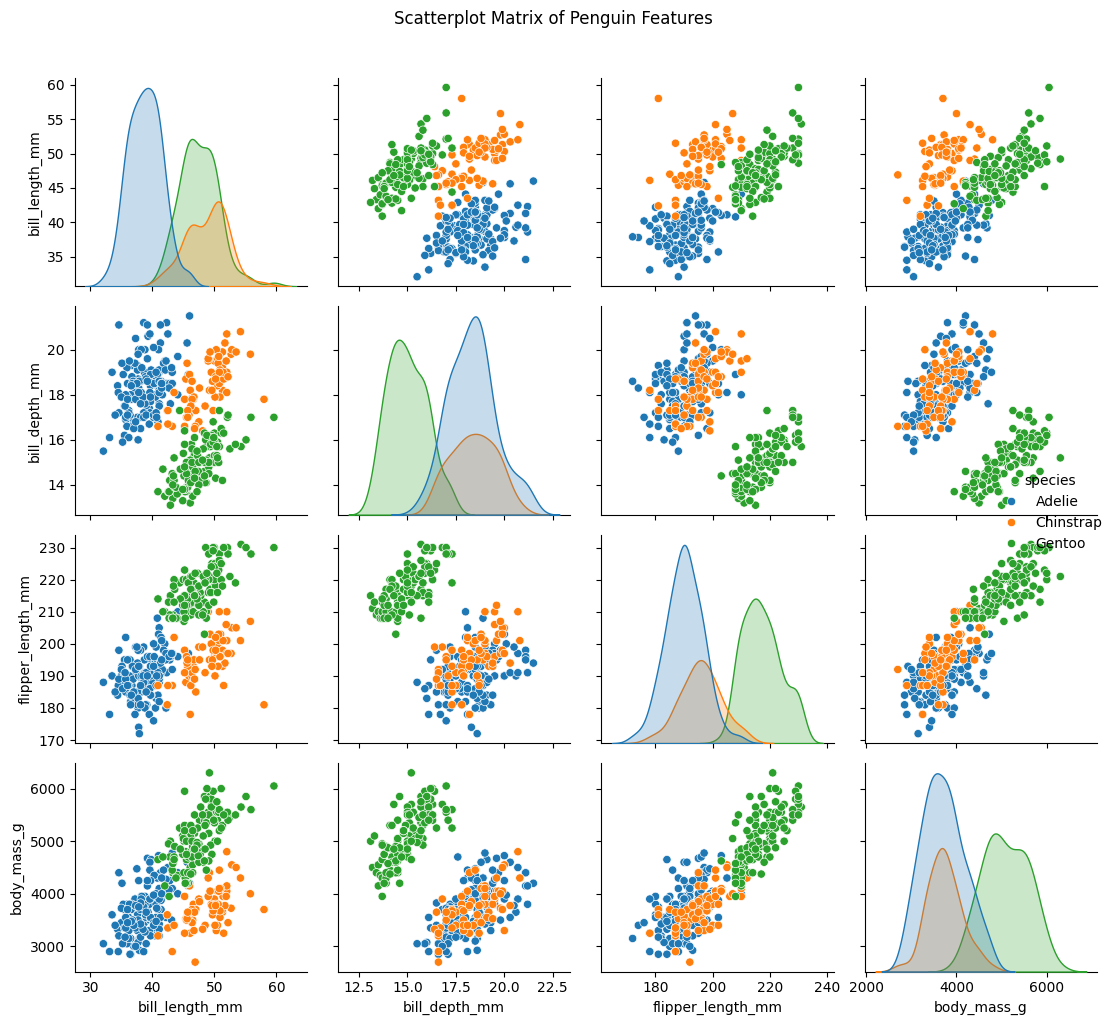

Outliers count: 0
Lower bound: 155.5, Upper bound: 247.5


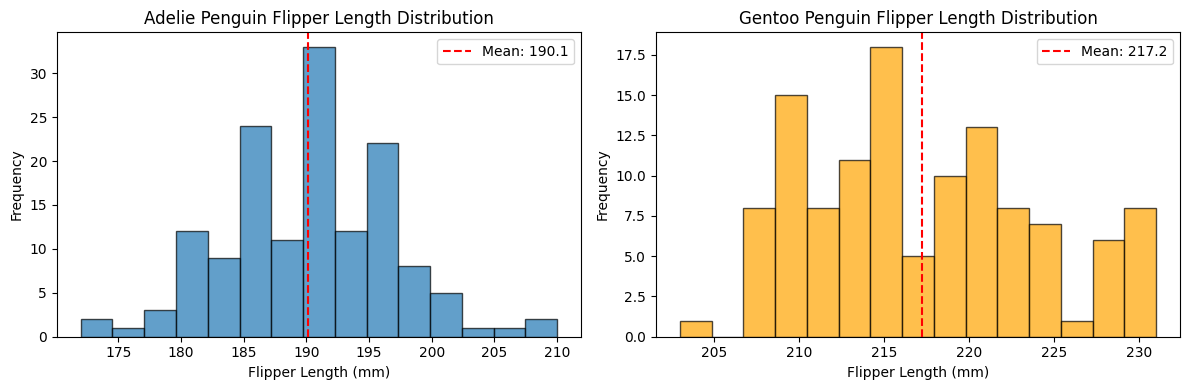


Adelie mean: 190.10, Std: 6.52
Gentoo mean: 217.24, Std: 6.59


In [21]:
"""
Q2b (2 marks)
Create visualizations showing:
- Create scatterplot matrix for visual assessment of data
- Identify one feature with outliers and show distribution values for two classes (2 histograms).
"""

sb.pairplot(penguins_clean, hue='species', vars=numerical_features)
plt.suptitle('Scatterplot Matrix of Penguin Features', y=1.02)
plt.tight_layout()
plt.show()

Q1 = penguins_clean['flipper_length_mm'].quantile(0.25)
Q3 = penguins_clean['flipper_length_mm'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = penguins_clean[(penguins_clean['flipper_length_mm'] < lower_bound) | (penguins_clean['flipper_length_mm'] > upper_bound)]

print(f"Outliers count: {len(outliers)}")
print(f"Lower bound: {lower_bound}, Upper bound: {upper_bound}")
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Adelie penguins
adelie_data = penguins_clean[penguins_clean['species'] == 'Adelie']['flipper_length_mm']
axes[0].hist(adelie_data, bins=15, edgecolor='black', alpha=0.7)
axes[0].set_title('Adelie Penguin Flipper Length Distribution')
axes[0].set_xlabel('Flipper Length (mm)')
axes[0].set_ylabel('Frequency')
axes[0].axvline(adelie_data.mean(), color='red', linestyle='--', label=f'Mean: {adelie_data.mean():.1f}')
axes[0].legend()

# Gentoo penguins
gentoo_data = penguins_clean[penguins_clean['species'] == 'Gentoo']['flipper_length_mm']
axes[1].hist(gentoo_data, bins=15, edgecolor='black', alpha=0.7, color='orange')
axes[1].set_title('Gentoo Penguin Flipper Length Distribution')
axes[1].set_xlabel('Flipper Length (mm)')
axes[1].set_ylabel('Frequency')
axes[1].axvline(gentoo_data.mean(), color='red', linestyle='--', label=f'Mean: {gentoo_data.mean():.1f}')
axes[1].legend()

plt.tight_layout()
plt.show()

print(f"\nAdelie mean: {adelie_data.mean():.2f}, Std: {adelie_data.std():.2f}")
print(f"Gentoo mean: {gentoo_data.mean():.2f}, Std: {gentoo_data.std():.2f}")


Absolute counts: species
Adelie       146
Gentoo       119
Chinstrap     68
Name: count, dtype: int64

Proportions: species
Adelie       0.438438
Gentoo       0.357357
Chinstrap    0.204204
Name: proportion, dtype: float64


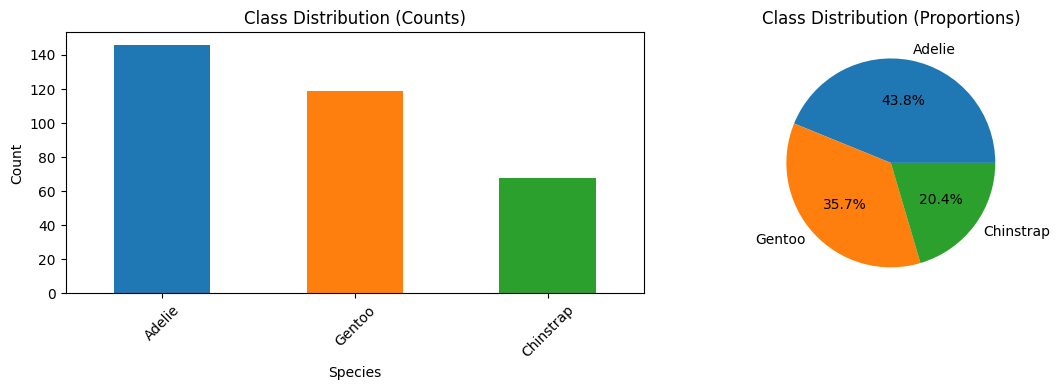

Largest class proportion: 0.438
Smallest class proportion: 0.204
Imbalance ratio: 2.15:1

Conclusion: There is moderate class imbalance. Consider using stratified sampling during train-test split.


In [30]:
"""
Q2c (1 mark)
Analyze class distribution and discuss implications for model training:
- Calculate and visualize class proportions
- Identify any class imbalance
"""

class_counts = penguins_clean['species'].value_counts()
class_proportions = penguins_clean['species'].value_counts(normalize=True)
print(f"\nAbsolute counts: {class_counts}" )
print(f"\nProportions: {class_proportions}")

fig, axes = plt.subplots(1, 2, figsize=(12, 4))
class_counts.plot(kind='bar', ax=axes[0], color=['#1f77b4', '#ff7f0e', '#2ca02c'])
axes[0].set_title('Class Distribution (Counts)')
axes[0].set_xlabel('Species')
axes[0].set_ylabel('Count')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)
axes[1].pie(class_proportions, labels=class_proportions.index, autopct='%1.1f%%', colors=['#1f77b4', '#ff7f0e', '#2ca02c'])
axes[1].set_title('Class Distribution (Proportions)')
plt.tight_layout()
plt.show()


max_prop = class_proportions.max()
min_prop = class_proportions.min()
imbalance_ratio = max_prop / min_prop
print(f"Largest class proportion: {max_prop:.3f}")
print(f"Smallest class proportion: {min_prop:.3f}")
print(f"Imbalance ratio: {imbalance_ratio:.2f}:1")

if imbalance_ratio < 1.5:
    print("\nThe dataset is relatively balanced.\nThis is favorable for training as the model is less likely to be biased toward the majority class. Standard accuracy metrics should be reliable.")
else:
    print("\nThere is moderate class imbalance. Consider using stratified sampling, splitting the sample group to subgroups based on specific characteristics, during train-test split.")

## Section 3: Model Development (8 marks)
After polishing thedata, let's make our classification model.

In [23]:
"""
Q3a (2 marks)
Preprocess the data:
- Use the clean dataset from Q2a (with missing values removed)
- Split into training (80%) and test (20%) sets using random_state=42
- Print first 5 rows of training data with their species labels
- Print shapes of both datasets
- Show number of samples per species in each split
"""


'\nQ3a (2 marks)\nPreprocess the data:\n- Use the clean dataset from Q2a (with missing values removed)\n- Split into training (80%) and test (20%) sets using random_state=42\n- Print first 5 rows of training data with their species labels\n- Print shapes of both datasets\n- Show number of samples per species in each split\n'

In [24]:
"""
Q3b (3 marks)
Train and evaluate a Decision Tree:
1. Create a Decision Tree with default parameters (random_state=42)
2. Evaluate the model:
   - Fit on training data (numerical features only)
   - Print training and test accuracy score for this tree
   - Perform 10-fold cross-validation
   - Print mean and std of cross-validation scores and build cv_scores histogram.
   - What does the histogram show?
"""

from sklearn.model_selection import cross_val_score

# YOUR ANSWER HERE


In [25]:
"""
Q3c (3 marks)
Analyze the best model from grid search:
- Initialize parameter_grid, cross_validation using StratifiedKFold
- Identify the best parameters for the tree and show the grid heatmap (don't forget labels)
- Plot the best tree structure using graphviz, use max_depth=2 (for better display)

Note: when using export_graphviz set out_file=None and use display(graph) function call, where
graph is your variable instantiated with Source(dot_data)
Export_graphviz Documentation: https://scikit-learn.org/1.5/modules/generated/sklearn.tree.export_graphviz.html
"""
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

import graphviz
from sklearn.tree import export_graphviz
from graphviz import Source

# YOUR ANSWER HERE


## Section 4: Missing_Sex Prediction (4 marks)
In this part of the assignment, we are building a model to infer the missing values from the original dataset to fix the broken records.


In [26]:
"""
Q4a (2 marks)
Prepare data for sex prediction:
- Use the clean dataset (no missing values) from Section 2
- Convert species to numeric values.

Note: Unlike the example in the tutorial, we will use a more straightforward method, LabelEncoder().

For this task, you just need to instantiate it, use the fit_transform method on the "species" column,
and reassign or add the column.
See documentation for details:
https://scikit-learn.org/dev/modules/generated/sklearn.preprocessing.LabelEncoder.html

- Create new feature/label split using "sex" as target
- Scale features using StandardScaler().fit_transform(features) as in Tutorial
See documentation: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

- Split data into training (80%) and test (20%) sets
- Train these classifiers:
  * Logistic Regression (solver='lbfgs')
  * Decision Tree (max_depth=3)
  * KNN (n_neighbors=5)
  * SVM (kernel="linear", C=0.025)
- Compare models using (Providing values for each would be enough):
  * Training and test accuracy
  * 10-fold cross-validation scores


"""

# Prepare features including species as numeric
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# YOUR ANSWER HERE


In [27]:
"""
Q4b (2 marks)
Use best model to predict missing sex:
- Make sure to create new variable for subset to work with and copy your variable with missing records into it,
using new_var = your_variable.copy().
- Print records with missing sex values from section 2.
- Remove records that have missing values other than sex using dropna: df.dropna(subset=['column_name'],inplace=True).
- Scale features using StandardScaler().fit_transform(features) as in Q3
- Create new features/labels variables for the new dataset.

- Select best classifier based on test performance from Q4a

- For each record in missing_sex dataset, using best_model.predict(features) and best_model.predict_proba(features)
- Add missing values to the clean dataset and make sure there are no missing values.
"""

# YOUR ANSWER HERE

"\nQ4b (2 marks)\nUse best model to predict missing sex:\n- Make sure to create new variable for subset to work with and copy your variable with missing records into it,\nusing new_var = your_variable.copy().\n- Print records with missing sex values from section 2.\n- Remove records that have missing values other than sex using dropna: df.dropna(subset=['column_name'],inplace=True).\n- Scale features using StandardScaler().fit_transform(features) as in Q3\n- Create new features/labels variables for the new dataset. \n\n- Select best classifier based on test performance from Q4a\n\n- For each record in missing_sex dataset, using best_model.predict(features) and best_model.predict_proba(features)\n- Add missing values to the clean dataset and make sure there are no missing values.\n"

#### Congratulations! What you just did is called **model-based multiple imputation**. It is one of the methods used to treat missing data.

## Signature:
Don't forget to insert your name and student number and execute.

In [28]:
# Provide your Signarure:
%load_ext watermark
%watermark -a 'Your Name, #Student_Number' -nmv --packages numpy,pandas,sklearn,matplotlib,seaborn,graphviz

ModuleNotFoundError: No module named 'watermark'